In [1]:
import cartopy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plot function

def plot_map(data_array):

    fig = plt.figure(figsize=(10, 10))

    ax = plt.axes(projection=cartopy.crs.PlateCarree())

    plt.contourf(
        data_array.lon,
        data_array.lat,
        data_array,
        20,
        transform=cartopy.crs.PlateCarree(),
        cmap=plt.cm.RdYlBu
    )

    gl = ax.gridlines(
        crs=cartopy.crs.PlateCarree(),
        draw_labels=True,
        linewidth=0.01
    )

    gl.top_labels = False
    gl.right_labels = False

    # contorno dos estados
    states = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        scale='50m', facecolor='none',
        name='admin_1_states_provinces_shp'
    )
    ax.add_feature(states, edgecolor='k')

    # contorno dos países
    countries = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        scale='50m', facecolor='none',
        name='admin_0_countries'
    )
    ax.add_feature(countries, edgecolor='k')

    plt.colorbar(shrink=0.9, orientation='vertical')

    plt.show()

In [3]:
# CPC = Precipitação diária (acumulado)
# 10 anos = 2011-01-01:2020-12-31
with xr.open_mfdataset('cpc/*nc') as dset:
    print(dset)
    precip = dset['precip']

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 3653)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...


In [4]:
precip

<xarray.DataArray 'precip' (time: 3653, lat: 360, lon: 720)>
dask.array<concatenate, shape=(3653, 360, 720), dtype=float32, chunksize=(366, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.      465.00006]
    units:         mm
    valid_range:   [   0. 1000.]
    dataset:       CPC Global Precipitation

## ACUMULADO E MÉDIA MENSAL

### Calcular acumulado mensal

In [5]:
mon_acc = precip.resample(time='1MS').sum('time')
mon_acc

<xarray.DataArray 'precip' (time: 120, lat: 360, lon: 720)>
dask.array<stack, shape=(120, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

### Rápida verificação ...

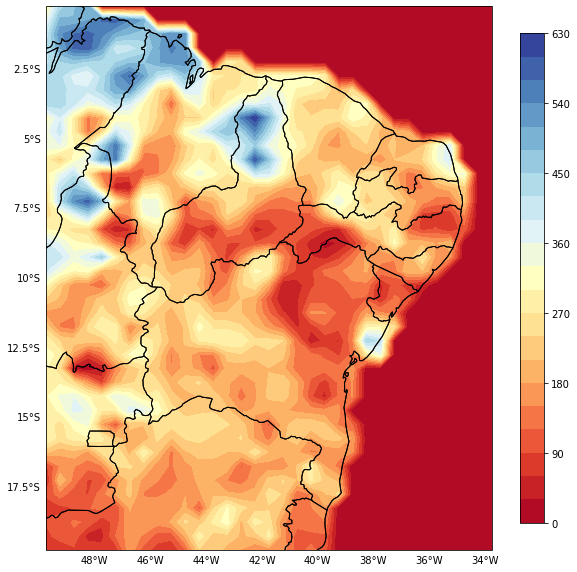

In [6]:
plot_map(mon_acc.sel(lat=slice(0, -20), lon=slice(310, 326.25), time='2020-03-01'))  # neb
# plot_map(mon_acc.sel(lat=slice(16.25, -58.75), lon=slice(276.75, 326.25), time='2020-03-01'))  # br
# https://tinyurl.com/2td8pwm9

In [7]:
mon_acc[0:12, 50, 50].values  # Primiero ano de dados -> 0:12 | Jan - Dez 2011 | Lat e Lon fixadas

array([55.55474 , 19.175543, 27.368586, 13.197407, 41.49178 , 79.055595,
       60.213333, 60.755993, 74.45124 , 50.458496, 20.9995  , 79.99153 ],
      dtype=float32)

In [8]:
precip[0:31, 50, 50].values  # os primeiros 31 dias: 2011-01

array([0.6648069 , 0.28830057, 0.3426532 , 0.        , 0.13012607,
       0.03313933, 3.9202652 , 6.314479  , 5.9290996 , 3.4544652 ,
       2.0579848 , 0.3564713 , 3.6627955 , 0.15093914, 0.29003495,
       0.87416315, 8.71415   , 0.5673661 , 0.51043975, 0.12329134,
       0.29844165, 4.0758686 , 0.03299337, 4.4471273 , 0.06649222,
       0.        , 0.        , 0.        , 3.7365322 , 2.7212212 ,
       1.7910855 ], dtype=float32)

In [9]:
np.sum(precip[0:31, 50, 50].values)

55.554733

In [10]:
precip[31:59, 50, 50].values  # os 28 dias seguintes: 2011-02

array([0.        , 4.986182  , 2.2240329 , 3.5406184 , 1.1344115 ,
       2.2716613 , 0.36388785, 0.80345666, 1.6916412 , 0.        ,
       0.57181805, 0.        , 0.1662867 , 0.        , 0.04816522,
       0.        , 0.03414645, 0.        , 0.        , 0.4168271 ,
       0.02427514, 0.        , 0.07854258, 0.05347318, 0.5866044 ,
       0.04319816, 0.06909981, 0.06721677], dtype=float32)

In [11]:
np.sum(precip[31:59, 50, 50].values)

19.175547

### Calcular a média mensal

In [12]:
mon_mean = precip.resample(time='1MS').mean('time')
mon_mean

<xarray.DataArray 'precip' (time: 120, lat: 360, lon: 720)>
dask.array<stack, shape=(120, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


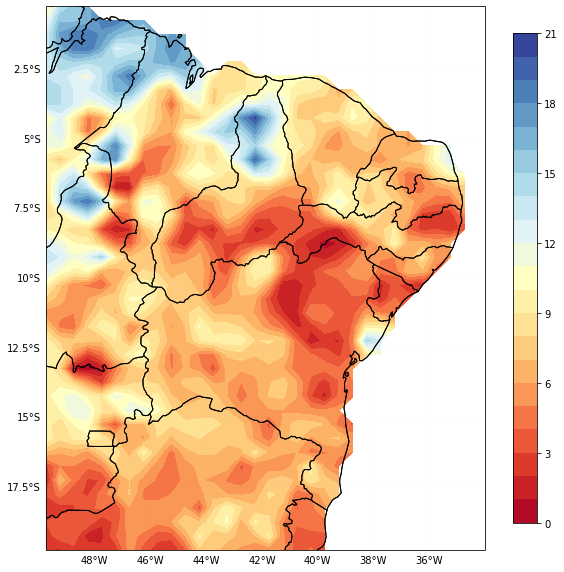

In [13]:
plot_map(mon_mean.sel(lat=slice(0, -20), lon=slice(310, 326.25), time='2020-03-01'))  # neb

### Rápida verificação ...

In [14]:
mon_mean[0:12, 50, 50].values  # Primiero ano -> 0:12 | Jan - Dez 2011

array([1.7920884 , 0.6848408 , 0.8828576 , 0.43991357, 1.3384445 ,
       2.6351864 , 1.9423655 , 1.9598707 , 2.481708  , 1.6276934 ,
       0.69998336, 2.580372  ], dtype=float32)

In [15]:
np.mean(precip[0:31, 50, 50].values)  # os primeiros 31 dias: 2011-01

1.7920882

In [16]:
np.mean(precip[31:59, 50, 50].values)  # os 28 dias seguintes: 2011-02

0.684841

### Desvio padrão mensal

In [17]:
# calcula desvio padrão mensal
mon_std = precip.resample(time='1MS').std('time')
mon_std

<xarray.DataArray 'precip' (time: 120, lat: 360, lon: 720)>
dask.array<stack, shape=(120, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

In [18]:
# Com valores NaN uso skipna=True
# mon_acc = precip.resample(time='1MS', skipna=True).sum('time')
# mon_mean = precip.resample(time='1MS', skipna=True).mean('time')
# mon_std = precip.resample(time='1MS', skipna=True).std('time')

## ACUMULADO E MÉDIA ANUAL

### Acumulado anual

In [19]:
anual_acc = precip.resample(time='1AS').sum('time')
anual_acc

<xarray.DataArray 'precip' (time: 10, lat: 360, lon: 720)>
dask.array<stack, shape=(10, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2012-01-01 ... 2020-01-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

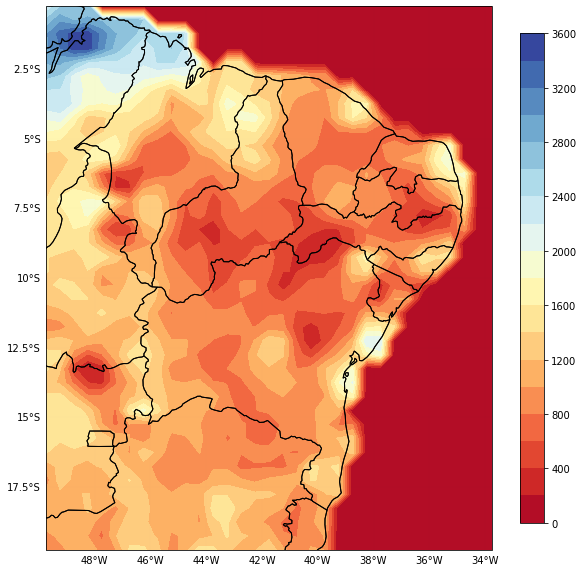

In [20]:
# verificação...
plot_map(anual_acc.sel(lat=slice(0, -20), lon=slice(310, 326.25), time='2020-01-01'))  # neb
# https://tinyurl.com/r4kb2s5m

### Média anual

In [21]:
anual_mean = precip.resample(time='1AS').mean('time')
anual_mean

<xarray.DataArray 'precip' (time: 10, lat: 360, lon: 720)>
dask.array<stack, shape=(10, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2012-01-01 ... 2020-01-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

### Desvio padrão anual

In [22]:
mon_std = precip.resample(time='1AS').std('time')
mon_std

<xarray.DataArray 'precip' (time: 10, lat: 360, lon: 720)>
dask.array<stack, shape=(10, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2012-01-01 ... 2020-01-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

In [23]:
# NaN values
# anual_acc = precip.resample(time='1AS', skipna=True).sum('time')
# anual_mean = precip.resample(time='1AS', skipna=True).mean('time')
# anual_std = precip.resample(time='1AS', skipna=True).std('time')

In [24]:
# # seleciona os meses fev, mar e abr
# def is_fma(month):
#     return (month >= 2) & (month <= 4) 
# pr_fma = pr.sel(time=is_fma(pr['time.month']))
# pr_fma.coords['time']

In [25]:
# # acumulado trimestral para cada ano
# pr_fma.resample(time='1AS').sum('time')

In [26]:
# Como faze apenas para um mÊs?

### CLIMATOLOGIAS

### Climatologia diária

In [27]:
# Climatologia diária
clim_day = precip.groupby("time.dayofyear").mean("time")
clim_day

<xarray.DataArray 'precip' (dayofyear: 366, lat: 360, lon: 720)>
dask.array<stack, shape=(366, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


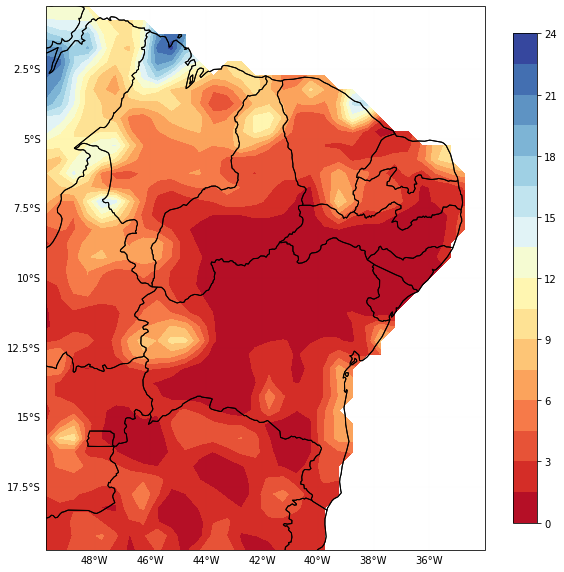

In [28]:
# Verificação...
# Plot climatologia diária
plot_map(clim_day.sel(lat=slice(0, -20), lon=slice(310, 326.25), dayofyear=75))  # dia juliano: (dayofyear)

### Rápida verificação ...

In [29]:
clim_day[0, 50, 50].values

array(0.9608286, dtype=float32)

In [30]:
precip[[0, 365, 731, 1096, 1461, 1826, 2192, 2557, 2922, 3287], 50, 50]  # para ver as datas referente as índices

<xarray.DataArray 'precip' (time: 10)>
dask.array<getitem, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 64.75
    lon      float32 25.25
  * time     (time) datetime64[ns] 2011-01-01 2012-01-01 ... 2020-01-01
Attributes:
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.      465.00006]
    units:         mm
    valid_range:   [   0. 1000.]
    dataset:       CPC Global Precipitation

In [31]:
precip[[0, 365, 731, 1096, 1461, 1826, 2192, 2557, 2922, 3287], 50, 50].values

array([0.6648069 , 0.        , 3.95814   , 1.2563162 , 0.        ,
       0.        , 0.        , 0.        , 2.8986223 , 0.83040017],
      dtype=float32)

In [32]:
np.mean(precip[[0, 365, 731, 1096, 1461, 1826, 2192, 2557, 2922, 3287], 50, 50].values)

0.9608286

### Climatologia do acumulado mensal de preciptação

In [33]:
# Passo 1: Calcular acumulado mensal
mon_acc = precip.resample(time='1MS').sum('time')

# Passo 2: Calcular a climatologia
# Média de Jan de todos os anos, Média de Fev de todos os anos...
clim_mon_acc = mon_acc.groupby('time.month').mean('time')

In [34]:
clim_mon_acc

<xarray.DataArray 'precip' (month: 12, lat: 360, lon: 720)>
dask.array<stack, shape=(12, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

### Exercício: Como fazer a climatologia mensal para Jan usando Numpy?

In [35]:
# Resposta: 

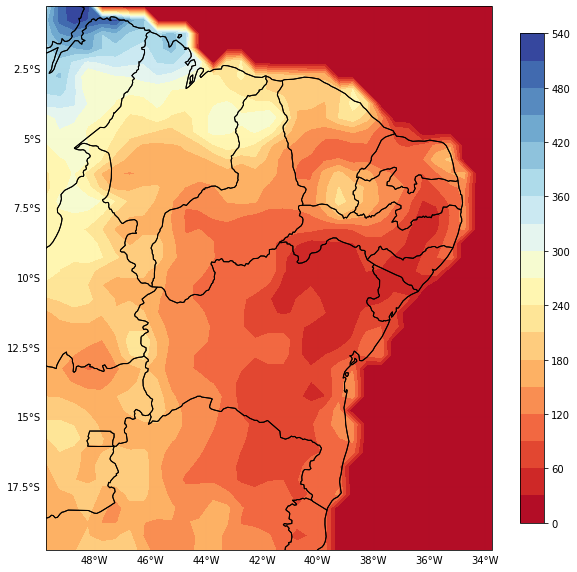

In [36]:
# month=1 (Jan), month=2 (Fev), ..., month=12(Dez)
# plot climatologia Março
plot_map(clim_mon_acc.sel(lat=slice(0, -20), lon=slice(310, 326.25), month=3))  # neb

### Calcular anomalias mensais 

In [37]:
anom_mon = mon_acc.groupby("time.month") - clim_mon_acc
anom_mon

<xarray.DataArray 'precip' (time: 120, lat: 360, lon: 720)>
dask.array<getitem, shape=(120, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

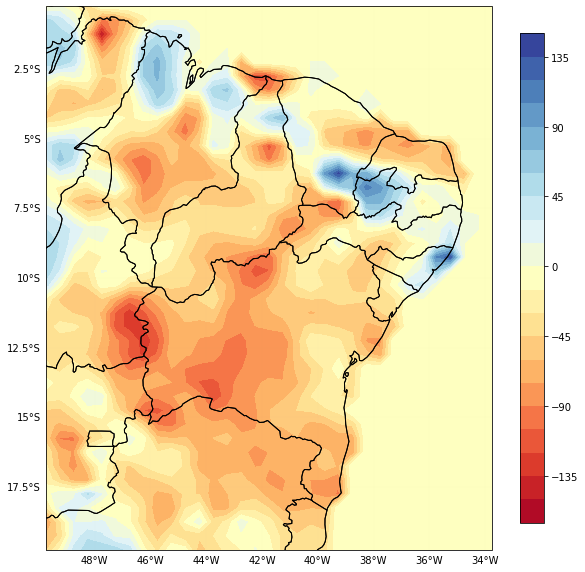

In [38]:
# Climatologia calculada: 2011:2020
plot_map(anom_mon.sel(lat=slice(0, -20), lon=slice(310, 326.25), time='2016-03-01'))  # neb

### Climatologia do acumulado de precipitação mensal para um período específico

In [39]:
clim_mon_acc_reg = mon_acc.sel(time=slice('2015', '2020'),
                               lon=slice(276.75, 326.25), 
                               lat=slice(16.25, -58.75)).groupby('time.month').mean('time')
clim_mon_acc_reg

<xarray.DataArray 'precip' (month: 12, lat: 151, lon: 100)>
dask.array<stack, shape=(12, 151, 100), dtype=float32, chunksize=(1, 151, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 16.25 15.75 15.25 14.75 ... -57.75 -58.25 -58.75
  * lon      (lon) float32 276.8 277.2 277.8 278.2 ... 324.8 325.2 325.8 326.2
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [40]:
# desvio padrão mensal ao longo dos anos (std)
clim_std_reg = mon_acc.sel(time=slice('2011', '2020'),
                           lon=slice(276.75, 326.25),
                           lat=slice(16.25, -58.75)).groupby('time.month').std('time')
clim_std_reg

<xarray.DataArray 'precip' (month: 12, lat: 151, lon: 100)>
dask.array<stack, shape=(12, 151, 100), dtype=float32, chunksize=(1, 151, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 16.25 15.75 15.25 14.75 ... -57.75 -58.25 -58.75
  * lon      (lon) float32 276.8 277.2 277.8 278.2 ... 324.8 325.2 325.8 326.2
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

### Calcular média espacial sobre uma região

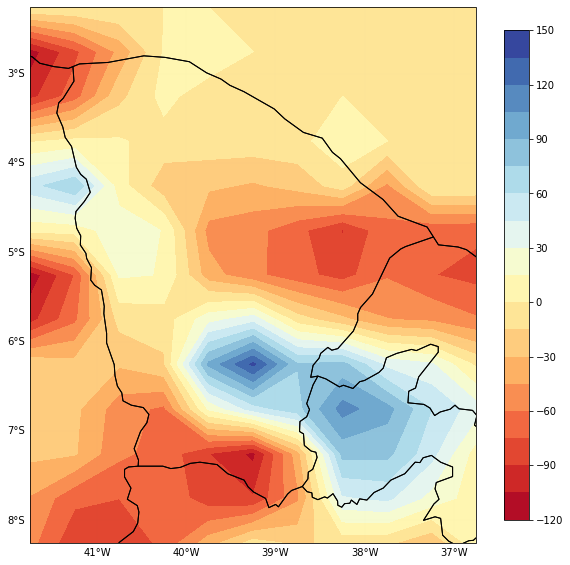

In [41]:
# plot da região de interesse
plot_map(anom_mon.sel(lat=slice(-2, -8.5), lon=slice(318, 323.5), time='2016-03-01'))  # neb

In [42]:
# seleciona a região para fazer a média espacial
mon_acc_reg = mon_acc.sel(lat=slice(-2, -8.5), lon=slice(318, 323.5))

# média espacial do acumulado mensal
mon_acc_reg_mean = mon_acc_reg.mean(dim=('lon', 'lat'))

mon_acc_reg_mean

<xarray.DataArray 'precip' (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [43]:
mon_acc_reg_mean.values

array([157.35858   , 156.5334    , 129.64369   , 162.70685   ,
       100.41666   ,  29.547142  ,  27.144346  ,  14.163511  ,
         1.3711938 ,  32.995884  ,  18.678068  ,   8.405455  ,
        44.517242  ,  99.36395   ,  74.492546  ,  36.297184  ,
        15.462571  ,  19.677803  ,   5.24517   ,   2.8186624 ,
         0.63573533,   2.4992929 ,   8.47334   ,   9.150375  ,
        48.119476  ,  43.96302   ,  65.41484   ,  92.244316  ,
        59.33927   ,  51.522644  ,  30.184925  ,   3.9224503 ,
         1.605508  ,   4.183687  ,  22.584806  ,  35.92491   ,
        28.579731  ,  74.79066   , 120.040855  , 109.18102   ,
        75.49618   ,  13.788041  ,  10.912548  ,   3.380168  ,
         5.349303  ,  11.841629  ,  22.030031  ,  16.424286  ,
        25.795584  ,  83.09152   , 135.70145   ,  87.44385   ,
        22.113886  ,  19.697683  ,  28.89441   ,   3.9053285 ,
         2.4785647 ,   1.8057761 ,   1.863376  ,  13.300324  ,
       160.13719   ,  49.227818  , 107.14031   ,  63.08